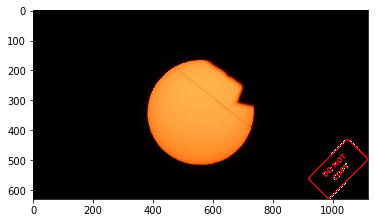

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images
img1 = cv2.imread('56.jpg')
img2 = cv2.imread('watermark_no_copy.png')
img2 =cv2.resize(img2,(200,200))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img1.shape

# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
x_offset = 1118-200
y_offset = 629-200
rows,cols,channels = img2.shape
roi = img1[y_offset:629,x_offset:1118] # BOTTOM RIGHT CORNER
plt.imshow(roi)


#WE CREATE A MASK OF THE WATERMARK OF ONLY THE RED PART
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.imshow(img2gray,cmap='gray')

mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray')

white_background = np.full(img2.shape, 255, dtype=np.uint8)
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
plt.imshow(bk)

fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)


#PUTTING THE WATERMARK ONTO THE REGION OF INTEREST
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)


large_img = img1
small_img = final_roi
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)